In [2]:
import pandas as pd
import sklearn
index = pd.date_range('2018-12-28','2019-1-10')
print(index)

DatetimeIndex(['2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31',
               '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', freq='D')


In [4]:
index = pd.date_range(end='2018-12-28',periods=6)
print(index)

DatetimeIndex(['2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', freq='D')


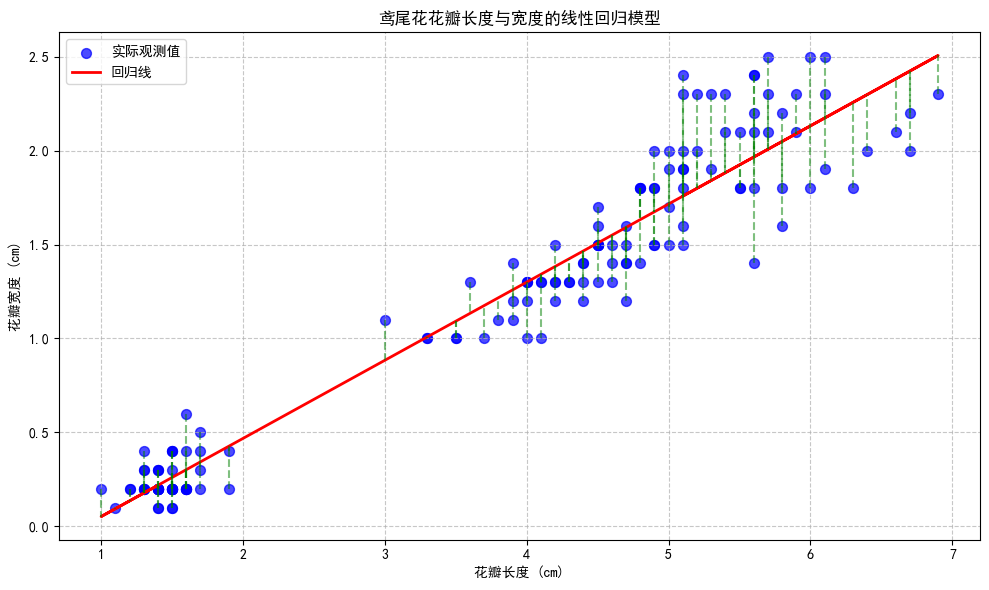


数据基本统计描述：
	sepal_length	sepal_width	petal_length	petal_width
count	150.0	150.0	150.0	150.0
mean	5.843333333333334	3.0573333333333337	3.7580000000000005	1.1993333333333336
std	0.828066127977863	0.4358662849366982	1.7652982332594662	0.7622376689603465
min	4.3	2.0	1.0	0.1
25%	5.1	2.8	1.6	0.3
50%	5.8	3.0	4.35	1.3
75%	6.4	3.3	5.1	1.8
max	7.9	4.4	6.9	2.5


模型评估：
回归系数：0.4158
截距：-0.3631
R² 分数：0.9271
均方误差：0.0421
预测示例（花瓣长度=3.9cm）：1.2584 cm


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 设置中文字体支持
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
iris = load_iris()
data = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# 准备数据
x = data['petal_length'].values.reshape(-1, 1)
y = data['petal_width'].values.reshape(-1, 1)

# 建立模型
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=50, color='blue', alpha=0.7, label='实际观测值')
plt.plot(x, y_pred, 'r-', linewidth=2, label='回归线')

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], 'g--', alpha=0.5)

plt.title('鸢尾花花瓣长度与宽度的线性回归模型')
plt.xlabel('花瓣长度 (cm)')
plt.ylabel('花瓣宽度 (cm)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# # 显示完整数据（方法1）
# print("数据全部内容信息：")
# with pd.option_context('display.max_rows', None):
#     print(data.to_csv(sep='\t', na_rep='nan'))

# 或显示数据摘要（方法3）
print("\n数据基本统计描述：")
print(data.describe().to_csv(sep='\t', na_rep='nan'))

# 输出模型参数和评估指标
print("\n模型评估：")
print(f"回归系数：{model.coef_[0][0]:.4f}")
print(f"截距：{model.intercept_[0]:.4f}")
print(f"R² 分数：{r2_score(y, y_pred):.4f}")
print(f"均方误差：{mean_squared_error(y, y_pred):.4f}")
print(f"预测示例（花瓣长度=3.9cm）：{model.predict([[3.9]])[0][0]:.4f} cm")